#### BLM442 Keşif aktivitesi-4: pandas & gorsellestirme

#### İsim/Soyisim: Mehmet Oğuz Aktaş
#### Öğrenci Numarası: 150201170
#### E-mail: oguzaktass@gmail.com
#### Kullanılan dataset adı: Company Acquisitions Data, Countries of the World, Watson Analytics Sample Data – Sales Products
#### Dataset url: https://www.kaggle.com/shivamb/company-acquisitions-7-top-companies
#### https://www.kaggle.com/fernandol/countries-of-the-world
#### https://www.ibm.com/communities/analytics/watson-analytics-blog/sales-products-sample-data/

#### İntihal: 
Netten alınacak kısmi kod parçaları önceden kod içinde/raporda belirtilmek ve soru sorulduğunda cevaplanması durumunda sıkıntı çıkarmayacaktır. (i) Internet kaynağını belirtmeyen/açıklayamayan/üzerinde geliştirme yapmayan veya (ii) birbirleriyle benzer/aynı çalışma teslim edenlerin aktiviteleri sıfır üzerinden değerlendirilecektir.

#### KA-4 Gönderim şekli

1-pdf olarak "ogrenciNo.pdf" dokumanını gonderme
-calisma dosyasında (File -> Print Preview) sonrası olusan html dosyasını yazdır deyip pdf olarak kaydetme veya
-(File -> Download as -> HTML) seklinde indirip pdf'e cevirme http://html2pdf.com/

2-(File -> Download as -> Notebook) indirip "ogrenciNo.ipynb" dokumanını gonderme

suleyman.eken@kocaeli.edu.tr

### Problemleriniz pandas fonksiyonlarını içerecek şekilde analiz edildikten sonra her probleme ait bir grafik sunulacaktır. Basit olarak su kadar satırı sec, bar grafik olarak goster tarzı problemler olmasın. Daha degerli bilgileri icerecek sekilde problem seciniz. Gorsellestirme icin matplotlib, seaborn, bokeh kutuphaneleri en az birer defa kullanılmalıdır..

#### Problem 1: Verisetini ve görselleştirme için gerekli modülleri import edip ilk 8 satın almanın hangi yıllarda olduğunu histogram ile gösteriniz.

Loading BokehJS ...

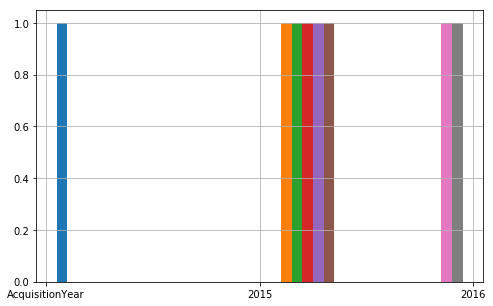

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()

csv_file = "./acquisitions.csv" # CSV import etme
df = pd.read_csv(csv_file, names = ["ID","Month","MonthDate","Year","Company","Business",
                                   "Country","Value","Product","ParentCompany"])
# CSV okuyup tabloları DataFrame seklinde kaydetme

df1 = df.head(8)

df1.Year.hist(bins=4, figsize=(8,5))

#### Problem 2: IBM şirketinin Amerika içinde yaptığı satın almaların yıllarını ve aylarını line plot ile gösteriniz.

/home/oguz/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


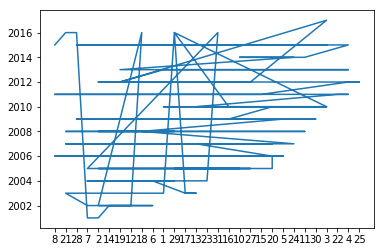

<Figure size 1600x480 with 0 Axes>

In [2]:
df2 = df.loc[(df.ParentCompany == 'IBM') & (df.Country == 'USA')]
df2.Year = df2.Year.astype(int)
plt.plot(df2.MonthDate, df2.Year)

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

plt.show()
#df2.Year.plot(figsize=(10,5));

#### Problem 3: Apple şirketinin 2016'da yaptığı satın almaları bularak ID numarası ile birlikte satın alma sayısını bar chart grafiği ile gösteriniz.

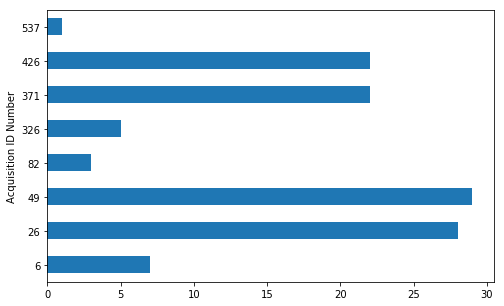

In [3]:
df3 = df[(df.ParentCompany=="Apple") & (df.Year=="2016")]
df3.MonthDate = pd.to_numeric(df3.MonthDate)
plt.ylabel('Acquisition ID Number')
df3.MonthDate.plot(kind='barh', figsize=(8,5))

#### Problem 4: Google şirketinin yıllara göre yaptığı satın almaları line plot grafiği ile gösteriniz.

/home/oguz/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


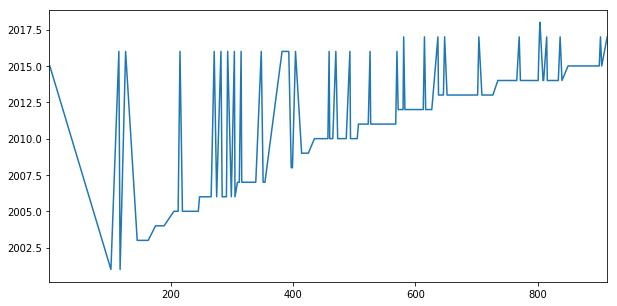

In [4]:
df4 = df.loc[df.ParentCompany == 'Google']
df4.Year = df4.Year.astype(int)
df4.Year.plot(figsize=(10,5));

#### Problem 5: Sales products verisetindeki ürün gruplarını göstererek gelirlerine göre bar chart grafiğinde gösteriniz.

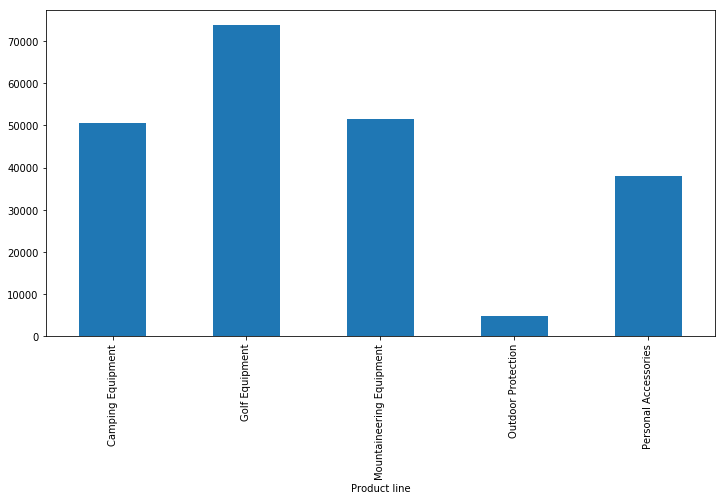

In [5]:
sales=pd.read_csv('WA_Sales_Products_2012-14.csv')

productline_revenue = sales.groupby('Product line').mean()['Revenue']
productline_revenue
fig,axes = plt.subplots(figsize=(12,6))
revenue_plot = productline_revenue.plot(kind='bar')

#### Problem 6: Sales verisetinde gelir ve ürün kalitesi kayıtlarını arasındaki ilişkiyi scatter plot grafiğinde gösteriniz.

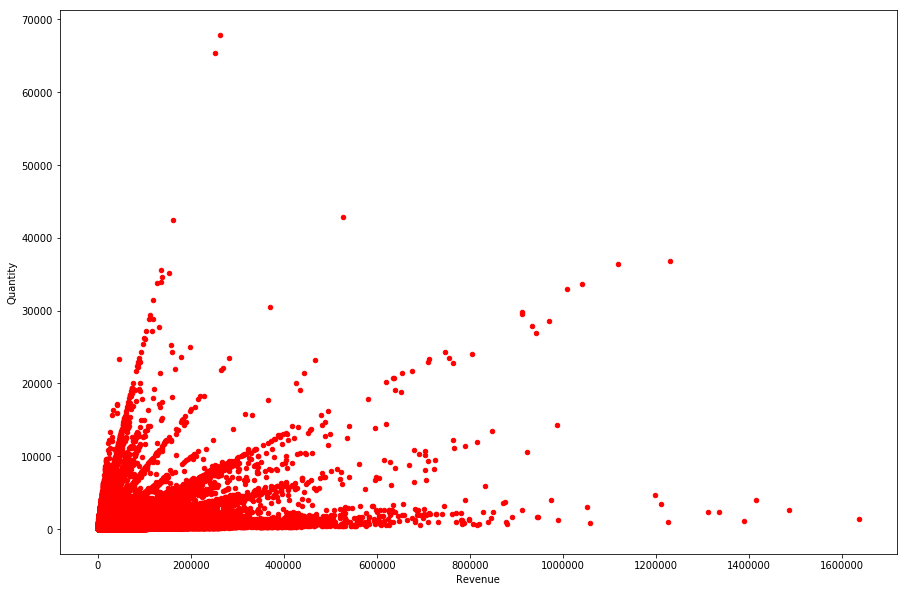

In [6]:
'''
countries = pd.read_csv("./countries-of-the-world.csv", names = ["Country","Region","Population","Area","PopDensity","Coastline",
                                   "NetMigration","InfantMortality","GDP","Literacy","Phones","Arable","Crops","Other","Climate",

                                                                 "Birthrate","Deathrate","Agriculture","Industry","Service"])

df6 = countries.loc[countries.GDP > 200]
df6.plot();
'''

ax = plt.gca()

sales.plot(kind='scatter',x='Revenue',y='Quantity', color='red', ax=ax, figsize=(15,10))

plt.show()

#### Problem 7: Satışları ürün tipinie göre gruplandırıp satış miktarlarının ortalamasını (sales quantity) alarak grafikte gösteriniz.

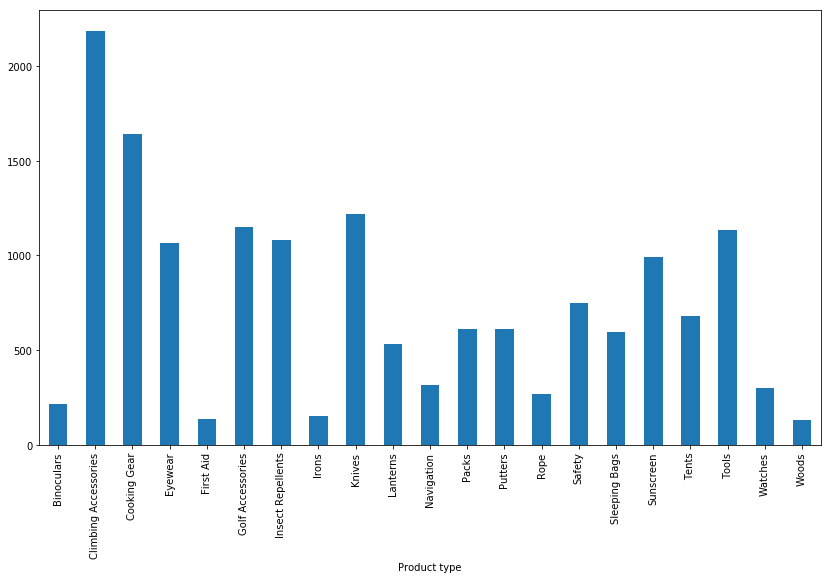

In [7]:
sales_quantity = sales.groupby('Product type').mean()['Quantity']
sales_quantity
fig, axes = plt.subplots(figsize=(14,8))
quantity_plot= sales_quantity.plot(kind='bar')

#### Problem 8: Ürün grubu ve ürün tipi toplamlarına göre gruplandırarak ürün satış miktarları ortalamalarını stacked bar grafiğinde gösteriniz.

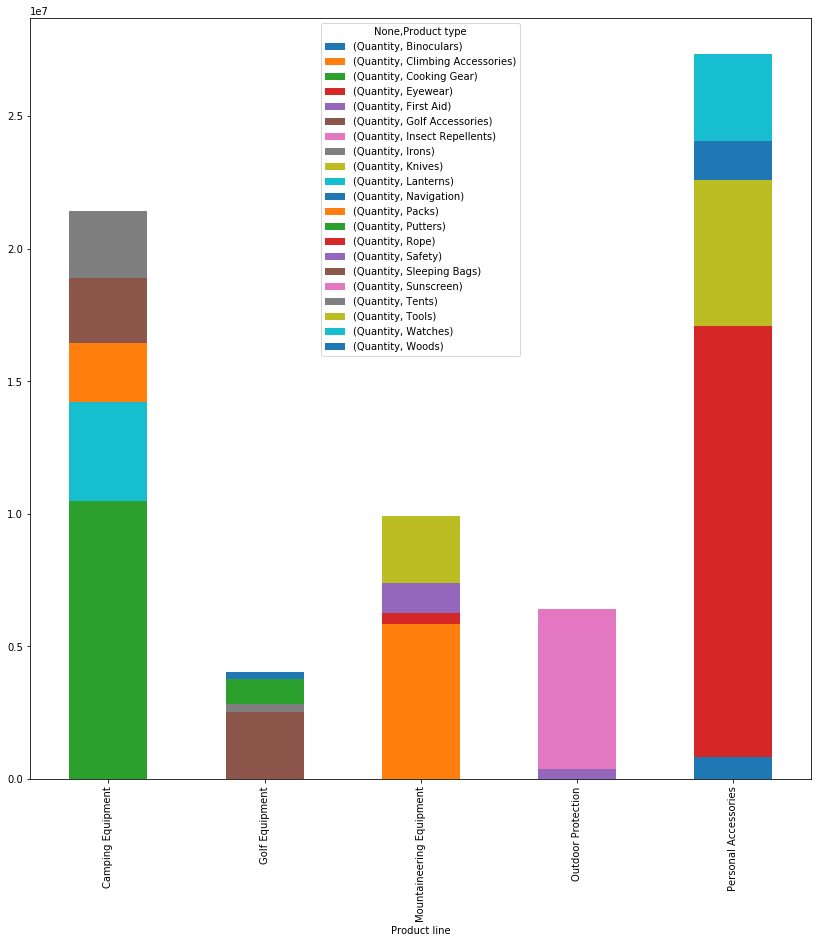

In [8]:
customes = sales [['Product line','Product type', 'Quantity']]
category_group = customes.groupby(['Product line','Product type']).sum()
category_group_graph = category_group.unstack().plot(kind='bar',stacked=True,legend=('0'),figsize=(14,14))

#### Problem 9: Üstteki problemin çözümünü bu sefer pie graph ile gösteriniz.

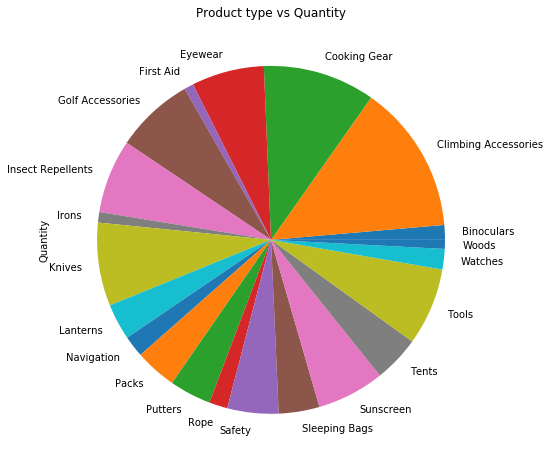

In [9]:
sales_quantity = sales.groupby('Product type').mean()['Quantity']
fig, axes = plt.subplots(figsize=(8,8))
quantity_plot= sales_quantity.plot(kind='pie', title="Product type vs Quantity")

#### Problem 10: Ürün grubu ve ürün tipi toplamlarına göre gruplandırarak ürün satış miktarlarını seaborn kullanarak distplot histogramında gösteriniz.

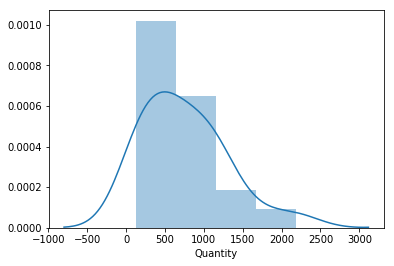

In [10]:
sns.distplot(sales_quantity)

#### Yararlandığım kaynaklar;
https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas

https://opentechguides.com/how-to/article/dataanalytics/179/jupyter-notebook-pandas.html

https://www.ibm.com/communities/analytics/watson-analytics-blog/sales-products-sample-data/

https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82

https://github.com/devbabar/sales_data_analysis_visualization

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

https://realpython.com/python-data-visualization-bokeh/#from-data-to-visualization